```
From: https://github.com/ksatola
Version: 0.0.1

TODOs
1. 

```

# Unsupervised Feature Selection Methods

- Removing features with low variance
- Removing collinear columns

In [1]:
# Connect with underlying Python code
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

In [2]:
from datasets import (
    get_dataset
)

from feature_selection import (
    select_features
)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [4]:
# target = 'survived'
df = get_dataset('titanic3')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


---

## Removing features with low variance
[VarianceThreshold](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection) is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are `Bernoulli random variables`, and the variance of such variables is given by 
```
Var[X]=p(1-p)
```
so we can select using the threshold .8 * (1 - .8):

In [5]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

We can also count number of value counts groups to recognize how many different values represent a feature.

---

## Removing collinear columns

In [6]:
corr = df.corr()
corr

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [7]:
mask = np.triu(df.corr(), k=1)
mask

array([[ 0.        , -0.31246936, -0.40810574,  0.06083201,  0.0183222 ,
        -0.55862873, -0.03464194],
       [ 0.        ,  0.        , -0.05551252, -0.02782512,  0.08265957,
         0.24426547,         nan],
       [ 0.        ,  0.        ,  0.        , -0.24369949, -0.15091743,
         0.17873932,  0.05880873],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.37358719,
         0.16023826, -0.09996053],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.22153866,  0.05109925],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.04311018],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [8]:
mask = np.triu(df.corr(), k=1).astype(bool)
mask

array([[False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False]])

In [9]:
corr_no_diag = corr.where(mask)
corr_no_diag

,pclass,survived,age,sibsp,parch,fare,body
pclass,NaN,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,NaN,NaN,-0.055513,-0.027825,0.082660,0.244265,NaN
age,NaN,NaN,NaN,-0.243699,-0.150917,0.178739,0.058809
sibsp,NaN,NaN,NaN,NaN,0.373587,0.160238,-0.099961
parch,NaN,NaN,NaN,NaN,NaN,0.221539,0.051099
fare,NaN,NaN,NaN,NaN,NaN,NaN,-0.043110
body,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# A different way
corr = df.corr()
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
corr_no_diag = corr.where(mask)
corr_no_diag

,pclass,survived,age,sibsp,parch,fare,body
pclass,NaN,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,NaN,NaN,-0.055513,-0.027825,0.082660,0.244265,NaN
age,NaN,NaN,NaN,-0.243699,-0.150917,0.178739,0.058809
sibsp,NaN,NaN,NaN,NaN,0.373587,0.160238,-0.099961
parch,NaN,NaN,NaN,NaN,NaN,0.221539,0.051099
fare,NaN,NaN,NaN,NaN,NaN,NaN,-0.043110
body,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
limit = 0.95 # find columns that have a correlation coefficient of .95 or above

colls = [c for c in corr_no_diag.columns if any(abs(corr_no_diag[c]) > limit)]
colls

[]

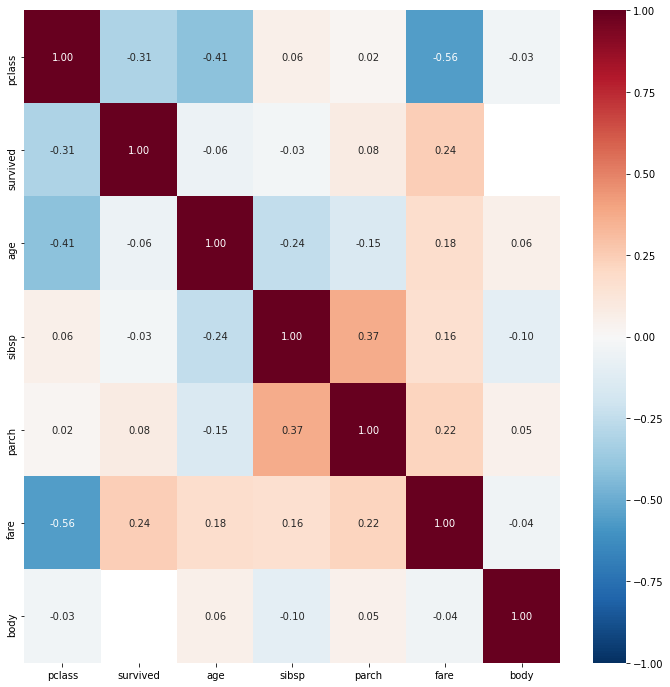

In [12]:
from seaborn import heatmap

fig, ax = plt.subplots(figsize=(12, 12))
ax = heatmap(df.corr(), fmt=".2f", annot=True, ax=ax, cmap="RdBu_r", vmin=-1, vmax=1,)
fig.savefig("images/feature_selection_correlation1.png", dpi=300)

The `rfpimp` package has a visualization of `multicollinearity`. The `plot_dependence_heatmap` function trains a random forest for each numeric column from the other columns in a training dataset. The dependence value is the R2 score from the out-of-bag (OOB) estimates for predicting that column.

The suggested way to use this plot is to find values close to 1. The label on the X axis is the feature that predicts the Y axis label. If a feature predicts another, you can remove the predicted feature (the feature on the Y axis). In our example, fare predicts pclass, sibsp, parch, and embarked_Q. We should be able to keep fare and remove the others and get similar performance.

In [13]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)
df_num = df_num.drop(columns=['body'])
df_num.dropna(inplace=True)

y = df_num[['survived']]
X = df_num.drop(columns=['survived'])

X.head()

,pclass,age,sibsp,parch,fare
0,1,29.0000,0,0,211.3375
1,1,0.9167,1,2,151.5500
2,1,2.0000,1,2,151.5500
3,1,30.0000,1,2,151.5500
4,1,25.0000,1,2,151.5500


In [14]:
X.shape

(1045, 5)

In [15]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Here is code showing that we get a similar score if we remove these columns
cols_to_remove = [
    "sibsp",
    "parch",
]

rf3 = RandomForestClassifier(random_state=42)
rf3.fit(X_train[[c for c in X_train.columns if c not in cols_to_remove]], y_train.values.ravel(),)
print(f'Accuracy of the dataset with removed columns: {rf3.score(X_test[[c for c in X_train.columns if c not in cols_to_remove]], y_test,):.3f}%')

rf4 = RandomForestClassifier(random_state=42)
rf4.fit(X_train, y_train.values.ravel())
print(f'Accuracy of the dataset with all columns: {rf4.score(X_test, y_test):.3f}%')

Accuracy of the dataset with removed columns: 0.634%
Accuracy of the dataset with all columns: 0.637%
